In [ ]:
# Install required libraries
!pip install pandas scipy scikit-learn seaborn matplotlib

# Import required libraries
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

# Load each dataset with specified encoding
test_df = pd.read_csv('/content/test.csv', encoding='ISO-8859-1')
testdata_manual_df = pd.read_csv('/content/testdata.manual.2009.06.14.csv', encoding='ISO-8859-1', header=None)
train_df = pd.read_csv('/content/train.csv', encoding='ISO-8859-1')

# Load the fourth dataset with known structure
column_names = ['polarity', 'id', 'date', 'query', 'user', 'text']
training_large_df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=column_names)

# Standardize test.csv - selecting necessary columns
test_df = test_df[['text', 'sentiment']]

# Standardize testdata.manual.2009.06.14.csv
testdata_manual_df.columns = ['polarity', 'id', 'date', 'query', 'user', 'text']
testdata_manual_df['sentiment'] = testdata_manual_df['polarity'].apply(lambda x: 'negative' if x == 0 else 'positive')
testdata_manual_df = testdata_manual_df[['text', 'sentiment']]

# Standardize train.csv - assuming it includes text and sentiment columns
train_df = train_df[['text', 'sentiment']]

# Standardize training.1600000.processed.noemoticon dataset
training_large_df['sentiment'] = training_large_df['polarity'].apply(lambda x: 'negative' if x == 0 else 'positive')
training_large_df = training_large_df[['text', 'sentiment']]

# Combine all datasets into one DataFrame
all_data = pd.concat([test_df, train_df, testdata_manual_df, training_large_df], ignore_index=True)

# Save the combined dataset to a new CSV file for later use
all_data.to_csv('/content/combined_tweet_data.csv', index=False)
print("\nCombined dataset saved as 'combined_tweet_data.csv'")

df = pd.read_csv('/content/combined_tweet_data.csv')
# Descriptive statistics
df.describe()


Combined dataset saved as 'combined_tweet_data.csv'


,text,sentiment
count,1080103,1080104
unique,1065346,3
top,isPlayer Has Died! Sorry,negative
freq,210,677885


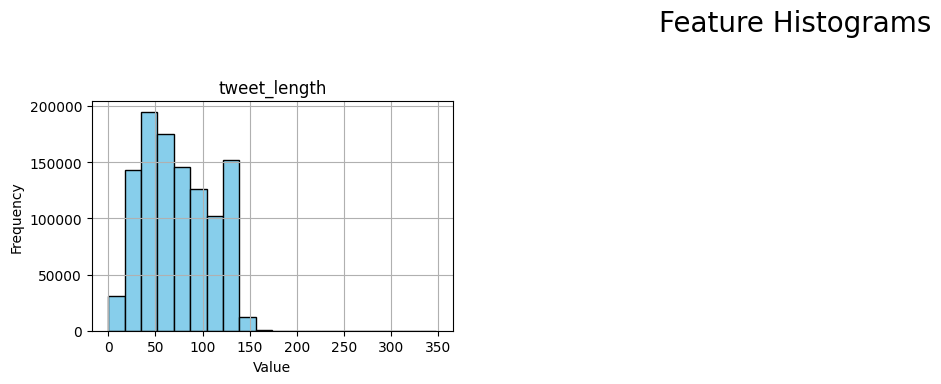

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Load the tweet dataset
df = pd.read_csv('/content/combined_tweet_data.csv')

df['text'] = df['text'].fillna('')
df['text'] = df['text'].astype(str)

# Add a new column for tweet length (number of characters)
df['tweet_length'] = df['text'].apply(len)

# Number of numeric features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numeric_columns)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)  # Calculate rows needed for subplots

# Set up the grid for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Check if axes is 1D and reshape it for correct indexing
if num_rows == 1:
    axes = axes.reshape(1, num_cols)  # Convert to 2D array for uniform indexing
else:
    axes = axes.reshape(num_rows, num_cols)

fig.suptitle("Feature Histograms", fontsize=20)

# Plot each numeric feature in a separate subplot
for i, feature in enumerate(numeric_columns):
    row, col = divmod(i, num_cols)
    df[feature].hist(bins=20, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")

# Adjust layout
for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Class Balance (Sentiment Distribution):
sentiment
negative    677885
positive    389671
neutral      12548


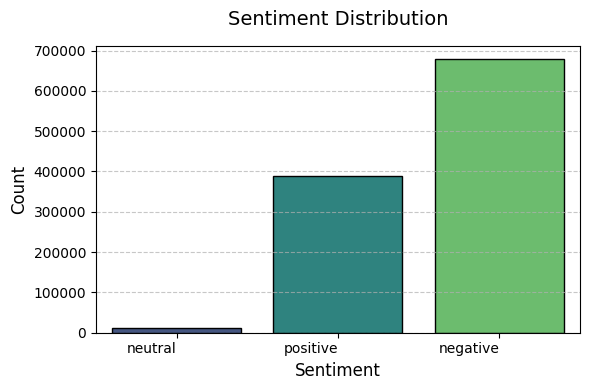

In [ ]:
# Load the tweet dataset
df = pd.read_csv('/content/combined_tweet_data.csv')

# Check class balance in the 'sentiment' column
print("Class Balance (Sentiment Distribution):")
print(df['sentiment'].value_counts().to_string())

# Visualize class balance with a countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette="viridis", edgecolor='black')

# Title and labels
plt.title("Sentiment Distribution", fontsize=14, pad=15)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjusting ticks
plt.xticks(fontsize=10, rotation=0, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


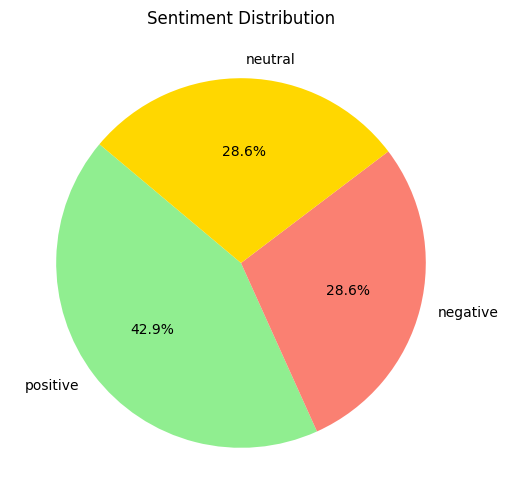

In [ ]:
data = {
    'sentiment': ['positive', 'negative', 'neutral',
                  'positive', 'negative', 'neutral',
                  'positive']
}
df = pd.DataFrame(data)

# Calculate proportions
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightgreen', 'salmon', 'gold']

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, startangle=140)
plt.title("Sentiment Distribution")
plt.show()

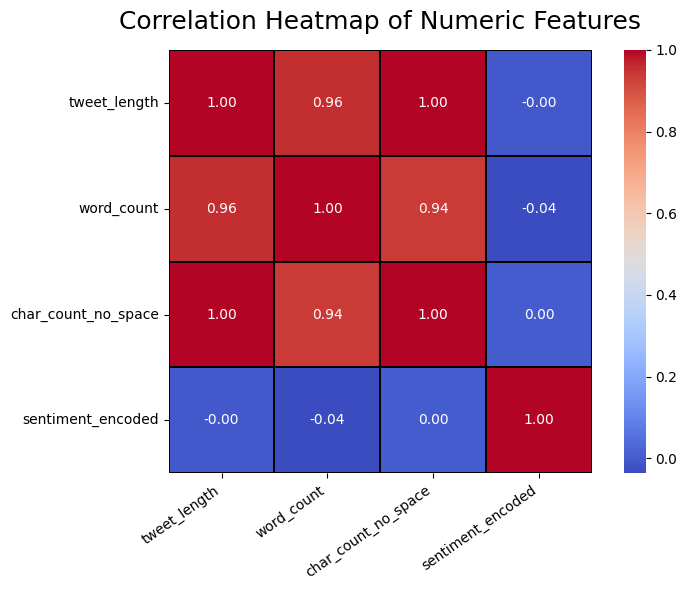

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/combined_tweet_data.csv')

# Add numeric features based on the text data
df['tweet_length'] = df['text'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)  # Tweet length
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)  # Word count
df['char_count_no_space'] = df['text'].apply(lambda x: len(str(x).replace(" ", "")) if isinstance(x, str) else 0)

# Encode the 'sentiment' column to numeric
df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Select only numeric columns for the correlation calculation
numeric_df = df[['tweet_length', 'word_count', 'char_count_no_space', 'sentiment_encoded']]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True,
            linewidths=0.3, linecolor='black', annot_kws={"size": 10})

# Title
plt.title("Correlation Heatmap of Numeric Features", fontsize=18, pad=15)
plt.xticks(rotation=35, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('/content/combined_tweet_data.csv')

# Add a new column for tweet length
df['tweet_length'] = df['text'].apply(lambda x: len(str(x))
if isinstance(x, str) else 0)

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the missing values for each column
print("Missing Values Per Feature:")
print(missing_values.to_string())

# Handle missing values for 'text' and 'sentiment'
# For text: Fill missing 'text' with an empty string
df['text'] = df['text'].fillna('')

# For sentiment: Fill missing 'sentiment' with 'neutral'
df['sentiment'] = df['sentiment'].fillna('neutral')

# For numeric columns like 'tweet_length', fill missing values with median
df['tweet_length'] = df['tweet_length'].fillna(df['tweet_length'].median())

# Check again after filling
missing_values_after = df.isnull().sum()

# Print missing values after handling
print("\nMissing Values After Handling:")
print(missing_values_after.to_string())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('/content/cleaned_tweet_data.csv', index=False)
print("\nCleaned data saved as 'cleaned_tweet_data.csv'.")


Missing Values Per Feature:
text            1282
sentiment       1281
tweet_length       0

Missing Values After Handling:
text            0
sentiment       0
tweet_length    0

Cleaned data saved as 'cleaned_tweet_data.csv'.


Top 10 Hashtags in Positive Tweets:
[('followfriday', 854), ('fb', 323), ('asot400', 264), ('FollowFriday', 168), ('delongeday', 167), ('shaunjumpnow', 126), ('1', 121), ('FF', 103), ('ff', 103), ('musicmonday', 96)]

Top 10 Hashtags in Negative Tweets:
[('fb', 911), ('squarespace', 628), ('iranelection', 316), ('fail', 236), ('inaperfectworld', 183), ('1', 162), ('BSB', 161), ('trackle', 144), ('2', 140), ('iremember', 139)]

Top 10 Hashtags in Neutral Tweets:
[('fb', 13), ('starwarsday', 7), ('followfriday', 6), ('twpp', 5), ('musicmonday', 3), ('SArmy', 3), ('2', 3), ('ff', 3), ('FollowFriday', 3), ('BGT', 3)]


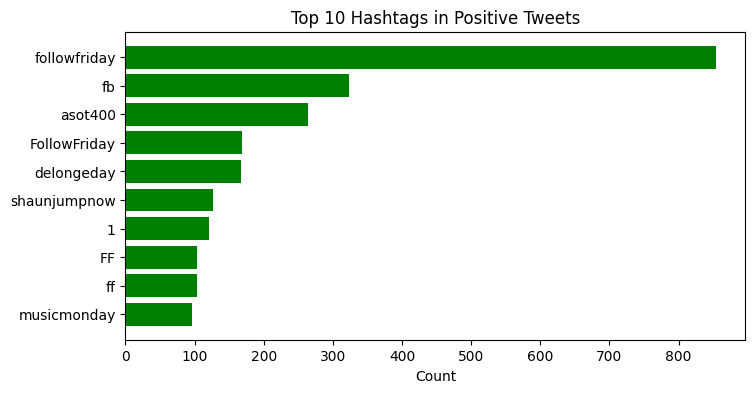

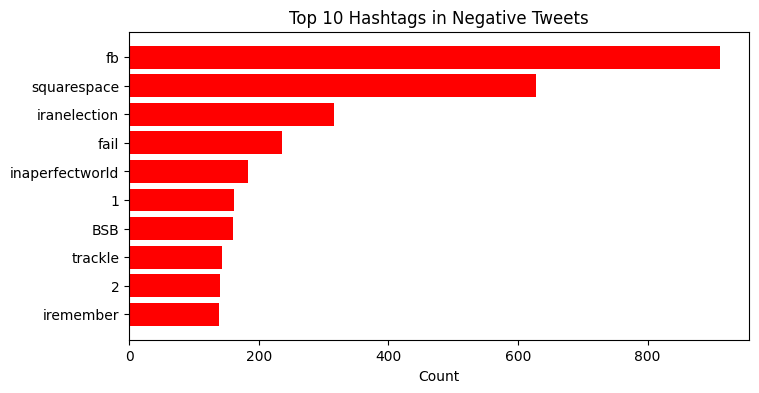

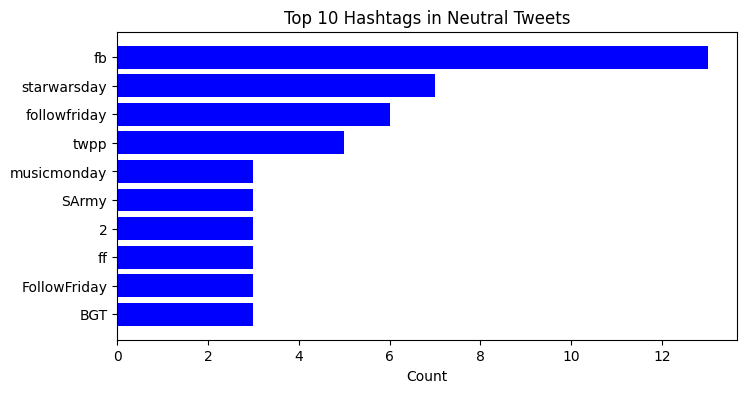

In [ ]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/cleaned_tweet_data.csv')

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))  # Convert to string to avoid errors with NaN

# Add a new column for hashtags
data['hashtags'] = data['text'].apply(extract_hashtags)

# Filter tweets by sentiment
positive_tweets = data[data['sentiment'] == 'positive']
negative_tweets = data[data['sentiment'] == 'negative']
neutral_tweets = data[data['sentiment'] == 'neutral']

# Get top hashtags for positive tweets
positive_hashtags = Counter([hashtag for hashtags in positive_tweets['hashtags'] for hashtag in hashtags])
print("Top 10 Hashtags in Positive Tweets:")
print(positive_hashtags.most_common(10))

# Get top hashtags for negative tweets
negative_hashtags = Counter([hashtag for hashtags in negative_tweets['hashtags'] for hashtag in hashtags])
print("\nTop 10 Hashtags in Negative Tweets:")
print(negative_hashtags.most_common(10))

# Get top hashtags for neutral tweets
neutral_hashtags = Counter([hashtag for hashtags in neutral_tweets['hashtags'] for hashtag in hashtags])
print("\nTop 10 Hashtags in Neutral Tweets:")
print(neutral_hashtags.most_common(10))

# Visualization function
def plot_top_hashtags(hashtags, title, color):
    if hashtags:
        labels, counts = zip(*hashtags.most_common(10))
        plt.figure(figsize=(8, 4))
        plt.barh(labels, counts, color=color)
        plt.title(title)
        plt.xlabel("Count")
        plt.gca().invert_yaxis()  # Reverse the order
        plt.show()
    else:
        print(f"No hashtags available for {title}")

# Plotting top hashtags
plot_top_hashtags(positive_hashtags, "Top 10 Hashtags in Positive Tweets", "green")
plot_top_hashtags(negative_hashtags, "Top 10 Hashtags in Negative Tweets", "red")
plot_top_hashtags(neutral_hashtags, "Top 10 Hashtags in Neutral Tweets", "blue")


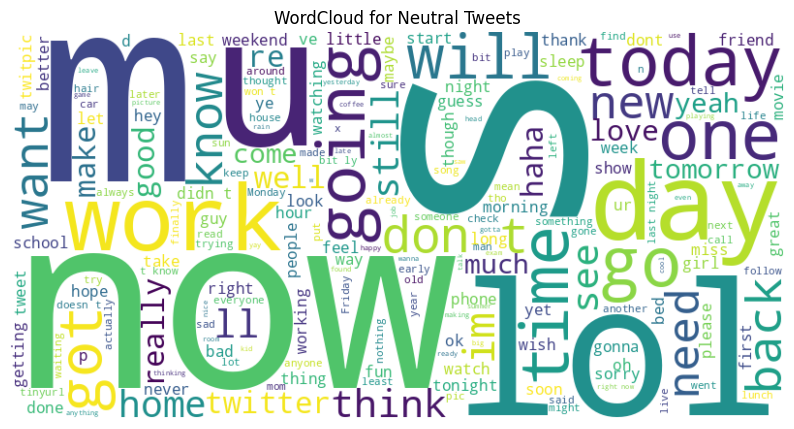

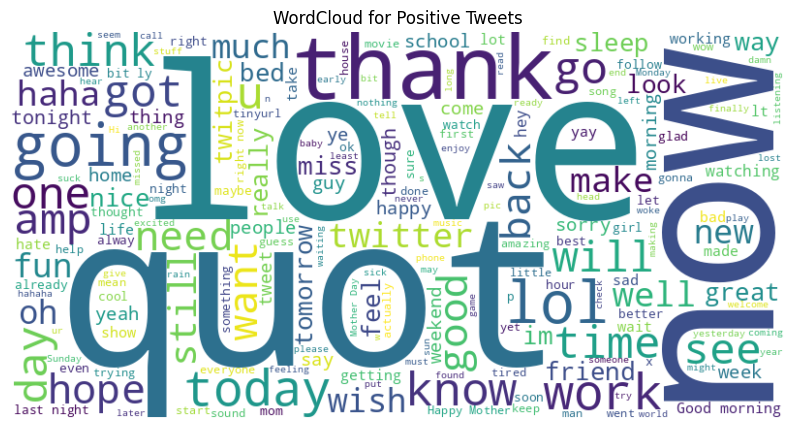

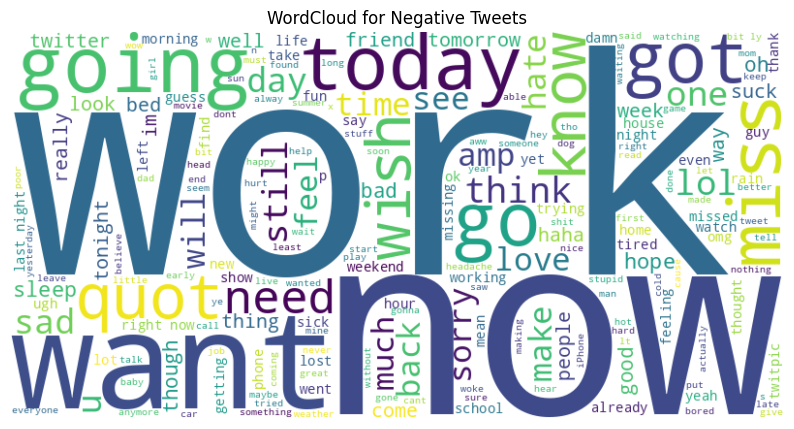

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/cleaned_tweet_data.csv')

# Ensure there are no NaN values in the text column
data['text'] = data['text'].fillna("")

# WordCloud for Frequent Words in Tweets
for sentiment in data['sentiment'].unique():
    sentiment_text = " ".join(data[data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment.capitalize()} Tweets")
    plt.show()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top words in positive tweets:
good: 26334
day: 24859
http: 19163
like: 18661
get: 18560
quot: 18422
love: 17656
today: 16483
go: 16422
got: 16174


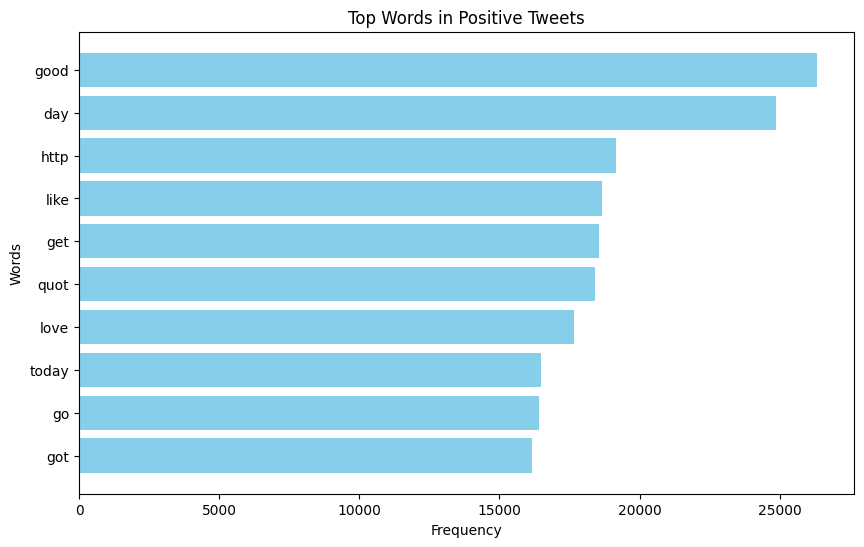


Top words in neutral tweets:
get: 693
http: 678
go: 652
got: 608
day: 565
lol: 555
work: 543
going: 531
like: 517
today: 494


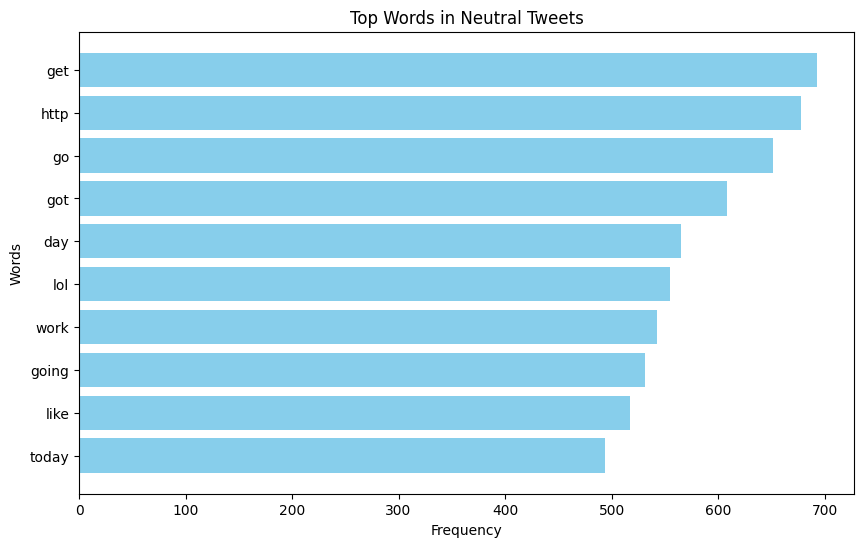


Top words in negative tweets:
get: 38648
go: 38270
work: 37333
like: 34964
got: 32646
day: 32161
today: 31654
going: 28338
back: 27048
really: 26854


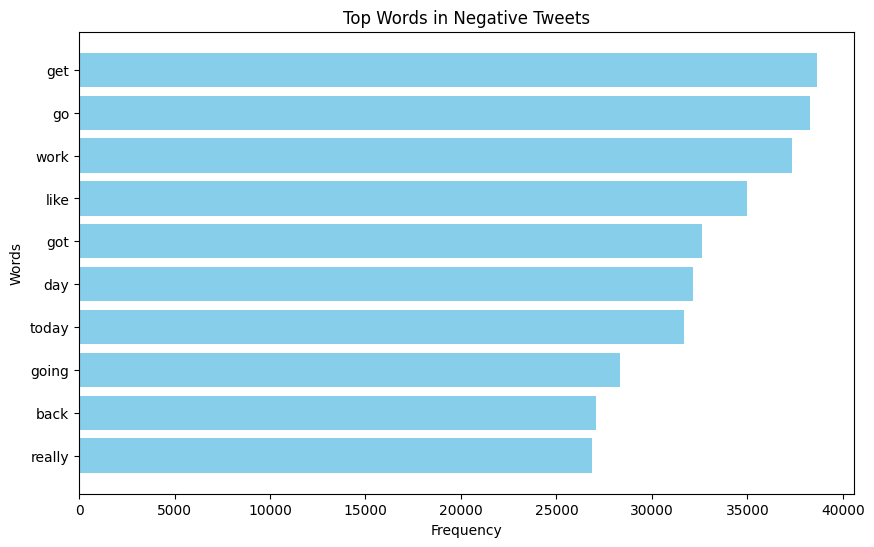

In [ ]:
import pandas as pd
import nltk
from collections import Counter

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('/content/cleaned_tweet_data.csv')

# Ensure 'text' column contains only strings and handle missing values
data['text'] = data['text'].fillna('').astype(str)

# Define stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

# Function to get top words for a sentiment
def get_top_words(sentiment, top_n=10):
    # Filter tweets by sentiment
    text_data = data[data['sentiment'] == sentiment]['text']

    # Tokenize, remove stopwords, and count word frequencies
    words = [word for tweet in text_data for word in nltk.word_tokenize(tweet.lower()) if word.isalpha()]
    filtered_words = [word for word in words if word not in stop_words]
    return Counter(filtered_words).most_common(top_n)

# Function to plot the top words
def plot_top_words(sentiment, top_words):
    words, counts = zip(*top_words)  # Unzip words and counts
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top Words in {sentiment.capitalize()} Tweets')
    plt.gca().invert_yaxis()  # Reverse order to show the most frequent word on top
    plt.show()

# Get and plot top words for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    top_words = get_top_words(sentiment)
    print(f"\nTop words in {sentiment} tweets:")
    for word, count in top_words:
        print(f"{word}: {count}")

    # Plot the top words for the current sentiment
    plot_top_words(sentiment, top_words)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Processing Positive tweets...

Top Bigrams in positive tweets:
gon na: 5228
good morning: 3578
last night: 3192
wan na: 3151
ca wait: 2472
mother day: 2192
got ta: 2175
mothers day: 1782
looking forward: 1711
good night: 1532


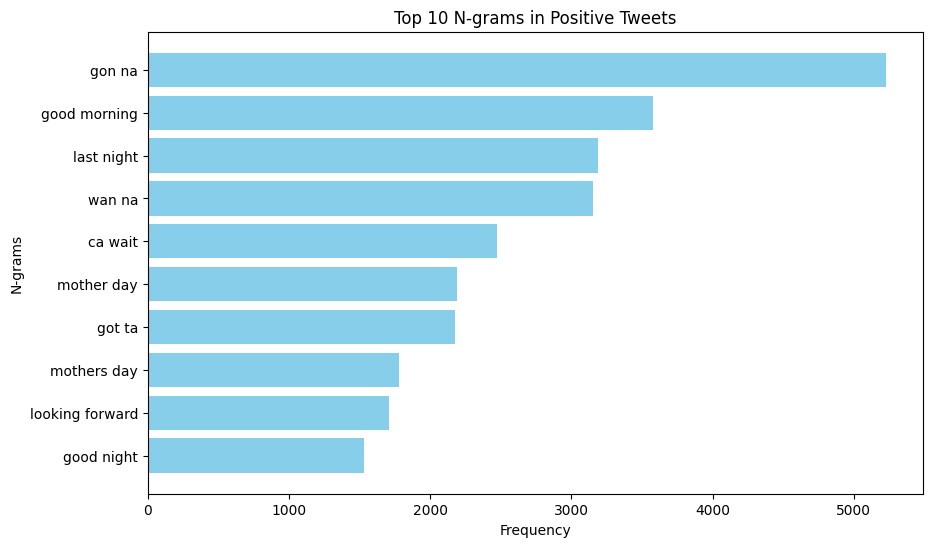


Top Trigrams in positive tweets:
happy mother day: 1479
happy mothers day: 1207
wan na go: 700
ca wait see: 465
gon na go: 422
im gon na: 389
getting ready go: 269
got ta go: 267
good morning everyone: 265
got ta love: 258


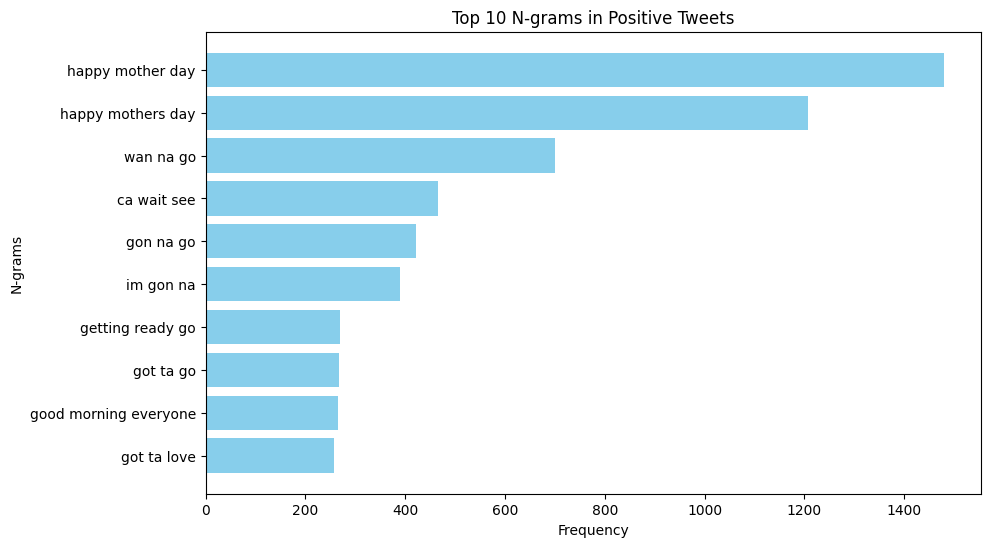


Processing Neutral tweets...

Top Bigrams in neutral tweets:
gon na: 185
wan na: 116
last night: 82
got ta: 82
na go: 54
next week: 49
mothers day: 47
getting ready: 42
oh well: 41
looks like: 39


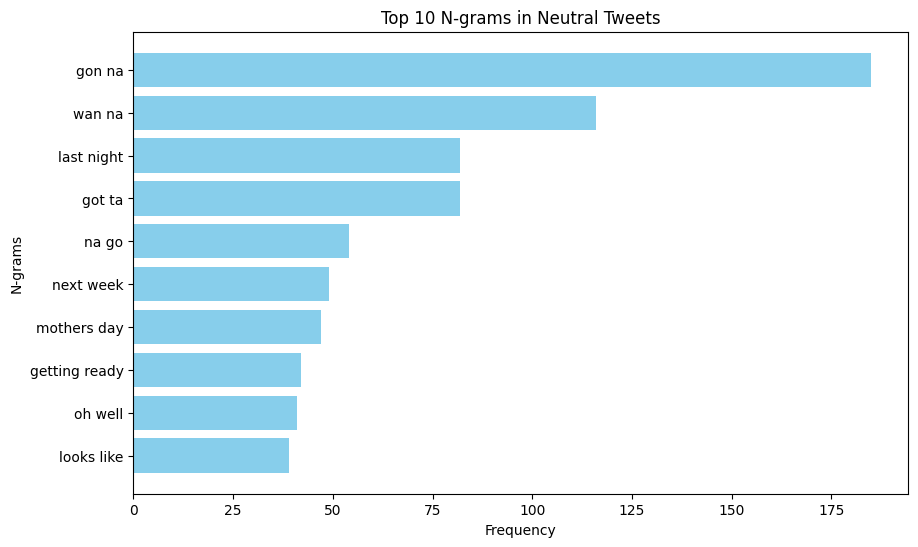


Top Trigrams in neutral tweets:
wan na go: 31
gon na go: 23
im gon na: 14
wan na see: 13
see star trek: 13
happy mothers day: 13
gon na miss: 12
got ta go: 12
gon na get: 11
happy mother day: 10


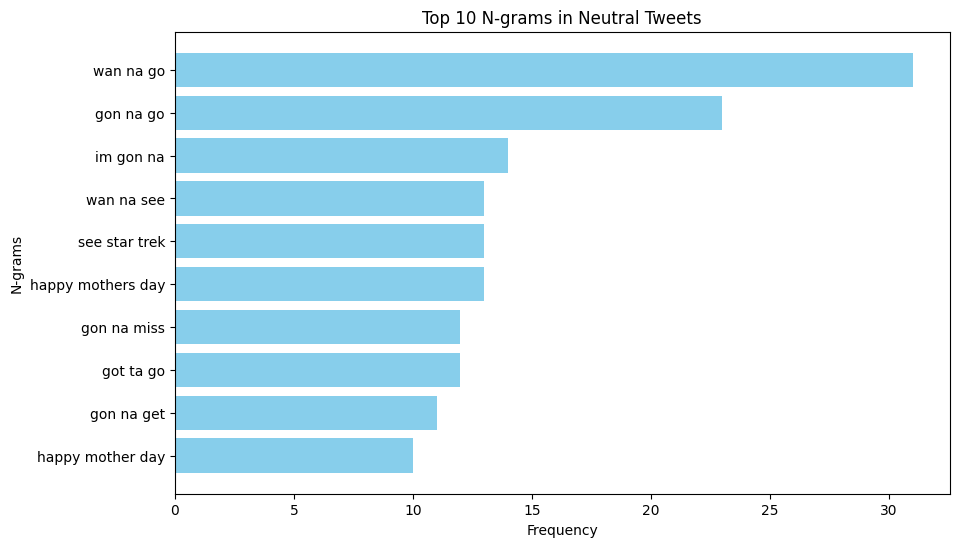


Processing Negative tweets...

Top Bigrams in negative tweets:
gon na: 11406
wan na: 10233
last night: 6078
wish could: 4884
got ta: 4429
feel like: 4427
na go: 3662
want go: 3471
looks like: 2807
go back: 2427


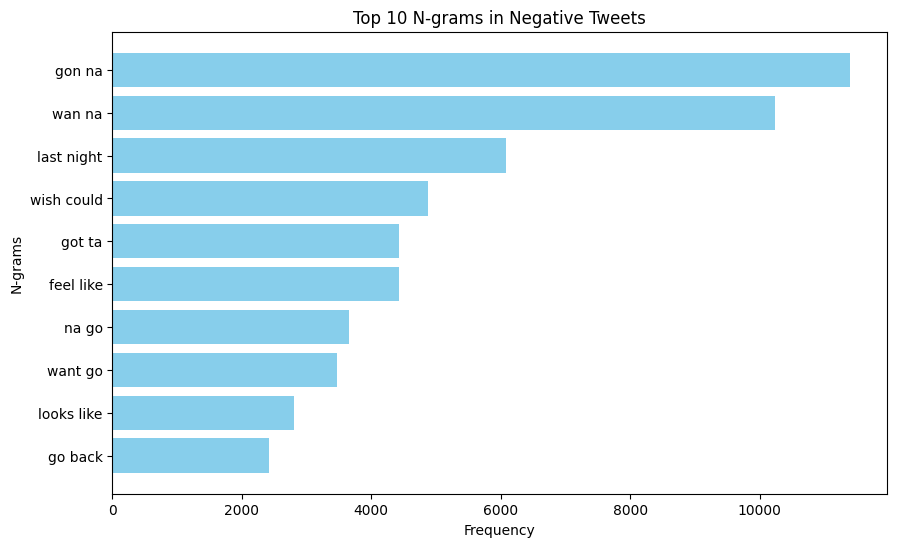


Top Trigrams in negative tweets:
wan na go: 2962
gon na miss: 1535
im gon na: 1155
dont wan na: 751
wish could go: 743
gon na go: 700
wan na see: 687
got ta go: 658
hope feel better: 578
got ta get: 516


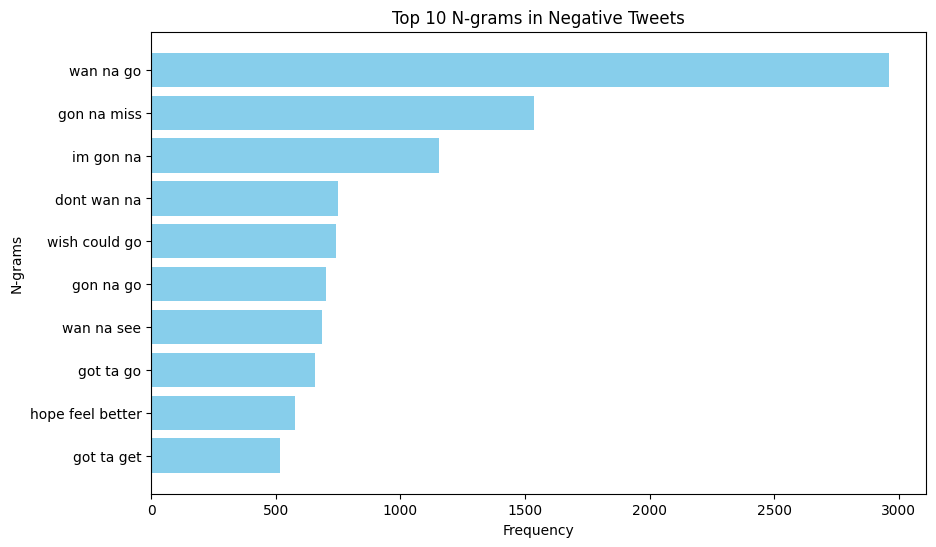

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the dataset
data = pd.read_csv('/content/scaled_tweet_data.csv')

# Ensure 'text' column contains only strings and handle missing values
data['text'] = data['text'].fillna('').astype(str)

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize the text (removes stopwords and non-alphabetic tokens)
def clean_and_tokenize(text):
    tokens = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha()]
    return [word for word in tokens if word not in stop_words]

# Extract n-grams (bigrams or trigrams) from the text
def extract_ngrams(text, n=2):
    tokens = clean_and_tokenize(text)
    return list(ngrams(tokens, n))

# Function to get top n-grams for a specific sentiment
def get_top_ngrams(sentiment, n=2, top_n=10):
    # Filter tweets by sentiment
    text_data = data[data['sentiment'] == sentiment]['text']

    # Generate n-grams from the text
    ngram_list = []
    for text in text_data:
        ngram_list.extend(extract_ngrams(text, n))

    # Count n-grams
    ngram_counts = Counter(ngram_list)

    # Return top n-grams
    return ngram_counts.most_common(top_n)

# Function to plot top n-grams
def plot_top_ngrams(ngram_counts, sentiment):
    ngrams, counts = zip(*ngram_counts)
    ngram_strings = [' '.join(ngram) for ngram in ngrams]
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_strings, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(f'Top {len(ngram_counts)} N-grams in {sentiment.capitalize()} Tweets')
    plt.gca().invert_yaxis()  # Reverse order to show the most frequent on top
    plt.show()

# Process and plot top bigrams and trigrams for each sentiment once
for sentiment in ['positive', 'neutral', 'negative']:
    print(f"\nProcessing {sentiment.capitalize()} tweets...")

    # Get and print top bigrams
    top_bigrams = get_top_ngrams(sentiment, n=2, top_n=10)
    print(f"\nTop Bigrams in {sentiment} tweets:")
    for ngram, count in top_bigrams:
        print(f"{' '.join(ngram)}: {count}")
    plot_top_ngrams(top_bigrams, sentiment)

    # Get and print top trigrams
    top_trigrams = get_top_ngrams(sentiment, n=3, top_n=10)
    print(f"\nTop Trigrams in {sentiment} tweets:")
    for ngram, count in top_trigrams:
        print(f"{' '.join(ngram)}: {count}")
    plot_top_ngrams(top_trigrams, sentiment)


Columns in the dataset: Index(['text', 'sentiment', 'tweet_length'], dtype='object')

Tweet Length Statistics by Sentiment:
              count       mean        std  min   25%   50%    75%    max
sentiment                                                               
negative   677885.0  74.345059  36.721385  5.0  44.0  70.0  104.0  348.0
neutral     13829.0  59.242534  39.556908  0.0  28.0  54.0   91.0  159.0
positive   389671.0  74.033952  36.321880  5.0  44.0  69.0  103.0  186.0


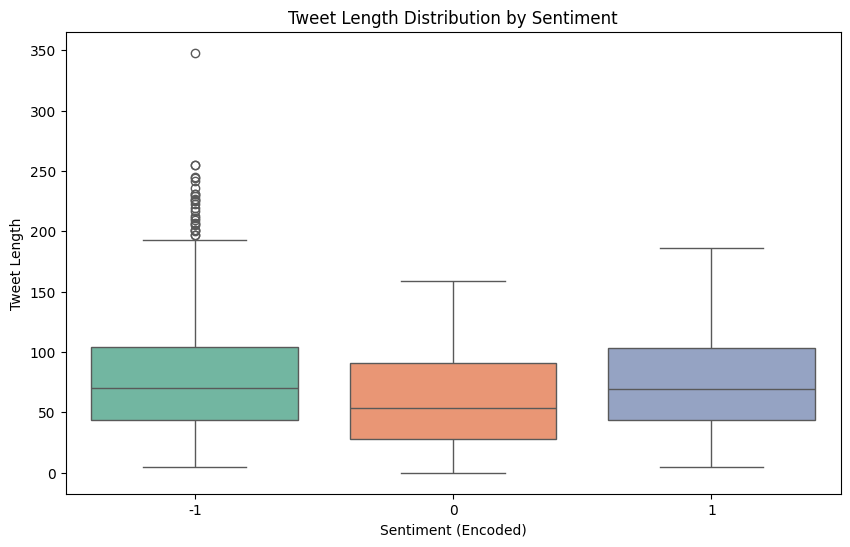

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/cleaned_tweet_data.csv')

# Print column names for reference
print("Columns in the dataset:", data.columns)

# Ensure 'text' column contains only strings and handle missing values
data['text'] = data['text'].fillna('')
data['text'] = data['text'].astype(str)

# Add sentiment encoding if not present
if 'sentiment_encoded' not in data.columns:
    data['sentiment_encoded'] = data['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# Add a new column for hashtags
data['hashtags'] = data['text'].apply(extract_hashtags)

# Add a new column for tweet length
data['tweet_length'] = data['text'].apply(len)

# Calculate and print tweet length statistics by sentiment
tweet_length_stats = data.groupby('sentiment')['tweet_length'].describe()
print("\nTweet Length Statistics by Sentiment:")
print(tweet_length_stats)

# Visualizing tweet length distribution by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_encoded', y='tweet_length', data=data, palette="Set2")
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Sentiment (Encoded)")
plt.ylabel("Tweet Length")
plt.show()


Index(['text', 'sentiment', 'tweet_length'], dtype='object')
Tweet Length - Skewness: 0.25, Kurtosis: -1.06
Sentiment - Skewness: 0.55, Kurtosis: -1.68


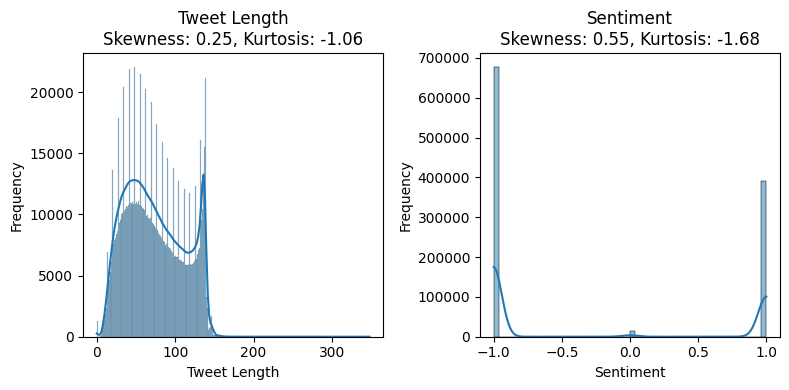

In [ ]:
from scipy.stats import skew, kurtosis

# Load the dataset
data = pd.read_csv('/content/cleaned_tweet_data.csv')

print(data.columns)

# Ensure 'text' column contains only strings and handle missing values
data['text'] = data['text'].fillna('')
data['text'] = data['text'].astype(str)

if 'sentiment_encoded' not in data.columns:
    data['sentiment_encoded'] = data['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# Add a new column for hashtags
data['hashtags'] = data['text'].apply(extract_hashtags)

# Calculate skewness and kurtosis for tweet length and sentiment
tweet_length_skewness = skew(data['tweet_length'])
tweet_length_kurtosis = kurtosis(data['tweet_length'])
sentiment_skewness = skew(data['sentiment_encoded'])
sentiment_kurtosis = kurtosis(data['sentiment_encoded'])

# Print skewness and kurtosis
print(f"Tweet Length - Skewness: {tweet_length_skewness:.2f}, Kurtosis: {tweet_length_kurtosis:.2f}")
print(f"Sentiment - Skewness: {sentiment_skewness:.2f}, Kurtosis: {sentiment_kurtosis:.2f}")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes = axes.flatten()

# Plot tweet length distribution with skewness and kurtosis
sns.histplot(data['tweet_length'], kde=True, ax=axes[0])
axes[0].set_title(f'Tweet Length\nSkewness: {tweet_length_skewness:.2f}, Kurtosis: {tweet_length_kurtosis:.2f}')
axes[0].set_xlabel('Tweet Length')
axes[0].set_ylabel('Frequency')

# Plot sentiment distribution with skewness and kurtosis
sns.histplot(data['sentiment_encoded'], kde=True, ax=axes[1])
axes[1].set_title(f'Sentiment\nSkewness: {sentiment_skewness:.2f}, Kurtosis: {sentiment_kurtosis:.2f}')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the cleaned tweet dataset
df = pd.read_csv('/content/cleaned_tweet_data.csv')

# Function to cap outliers using IQR method
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1, Q3 and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers to the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Identify numeric columns for outlier treatment
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Apply the outlier capping function
df = cap_outliers(df, numeric_columns)

# Save the DataFrame after outlier treatment
df.to_csv('/content/cleaned_tweet_data_no_outliers.csv', index=False)

# Load the saved data and display descriptive statistics
dd = pd.read_csv('/content/cleaned_tweet_data_no_outliers.csv')
print("Descriptive Statistics After Outlier Capping:")
print(dd.describe())

# Confirm the save
print("\nCleaned data (with capped outliers) saved as 'cleaned_tweet_data_no_outliers.csv'.")


Descriptive Statistics After Outlier Capping:
       tweet_length
count  1.081385e+06
mean   7.403902e+01
std    3.665144e+01
min    0.000000e+00
25%    4.400000e+01
50%    6.900000e+01
75%    1.040000e+02
max    1.940000e+02

Cleaned data (with capped outliers) saved as 'cleaned_tweet_data_no_outliers.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the cleaned tweet dataset with capped outliers
df = pd.read_csv('/content/cleaned_tweet_data_no_outliers.csv')

# Identify numeric columns for scaling
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Min-Max Scaling (scales features to the range 0-1)
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save the scaled dataset
df.to_csv('/content/scaled_tweet_data.csv', index=False)

# Display the first 5 rows of the scaled data
print("First 5 rows of the scaled data:")
print(df.head())

# Confirm the save
print("\nScaled data saved as 'scaled_tweet_data.csv'.")


First 5 rows of the scaled data:
                                                text sentiment  tweet_length
0  Last session of the day  http://twitpic.com/67ezh   neutral      0.252577
1   Shanghai is also really exciting (precisely -...  positive      0.530928
2  Recession hit Veronique Branquinho, she has to...  negative      0.402062
3                                        happy bday!  positive      0.061856
4             http://twitpic.com/4w75p - I like it!!  positive      0.201031

Scaled data saved as 'scaled_tweet_data.csv'.


In [ ]:
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # For stemming
from nltk.stem import WordNetLemmatizer  # Optional: For lemmatization
from nltk import download
from tqdm import tqdm  # For progress tracking
nltk.download('punkt_tab')

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # Optional: For lemmatization

# Load the scaled dataset
df = pd.read_csv('/content/scaled_tweet_data.csv')

# Ensure required columns exist
if 'text' not in df.columns:
    raise ValueError("The input CSV file must contain a 'text' column.")

# Function to clean the text (remove URLs, mentions, special characters)
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string cases
        return ''
    # Remove URLs, mentions, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Fill missing values in 'text' column with empty string before applying cleaning
df['text'] = df['text'].fillna('')

# Apply text cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

# Tokenization, stopword removal, and stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def tokenize_and_process(text):
    if not isinstance(text, str):
        return ''
    tokens = text.split()  # Use str.split() for faster tokenization
    filtered_tokens = [
        stemmer.stem(word) for word in tokens  # Stemming each token
        if word not in stop_words and word.isalpha()  # Remove stopwords and non-alphabetic tokens
    ]
    return ' '.join(filtered_tokens)

# Apply tokenization and stemming with progress tracking
tqdm.pandas()  # Initialize tqdm for pandas
df['processed_text'] = df['cleaned_text'].progress_apply(tokenize_and_process)

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER compound score
def get_sentiment(text):
    if not isinstance(text, str):
        return 'neutral'
    score = sia.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment_pred'] = df['processed_text'].progress_apply(get_sentiment)

# Display the first few rows with sentiment labels
print("First 5 rows with predicted sentiment:")
print(df[['text', 'cleaned_text', 'processed_text', 'sentiment_pred']].head())

# Save the updated dataset with sentiment predictions
df.to_csv('/content/tweet_sentiment_predictions.csv', index=False)

print("\nSentiment classification applied and saved as 'tweet_sentiment_predictions.csv'.")



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
100%|██████████| 1081385/1081385 [02:37<00:00, 6851.04it/s]


First 5 rows with predicted sentiment:
                                                text  \
0  Last session of the day  http://twitpic.com/67ezh   
1   Shanghai is also really exciting (precisely -...   
2  Recession hit Veronique Branquinho, she has to...   
3                                        happy bday!   
4             http://twitpic.com/4w75p - I like it!!   

                                        cleaned_text  \
0                          last session of the day     
1   shanghai is also really exciting precisely  s...   
2  recession hit veronique branquinho she has to ...   
3                                         happy bday   
4                                          i like it   

                                      processed_text sentiment_pred  
0                                   last session day        neutral  
1  shanghai also realli excit precis skyscrap gal...       positive  
2  recess hit veroniqu branquinho quit compani shame       negative  
3      

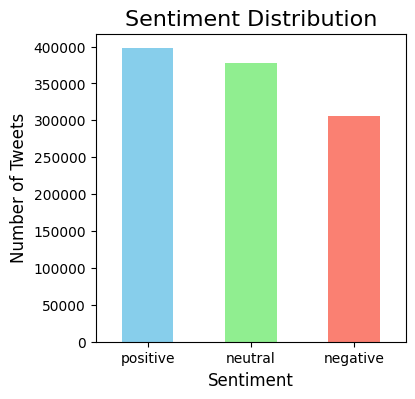

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with predicted sentiment
df = pd.read_csv('/content/tweet_sentiment_predictions.csv')

# Count the number of occurrences of each sentiment class
sentiment_counts = df['sentiment_pred'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(4, 4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=0)
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Training Logistic Regression with GridSearchCV...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best params for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Time taken for Logistic Regression: 124.36 seconds

Training Random Forest with GridSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Time taken for Random Forest: 1004.24 seconds

Evaluating Logistic Regression...
Accuracy: 0.7172191217743912
              precision    recall  f1-score   support

          -1       0.73      0.88      0.80    135648
           0       0.00      0.00      0.00      2773
           1       0.68      0.45      0.54     77856

    accuracy                           0.72    216277
   macro avg       0.47      0.45      0.45    216277
weighted avg       0.70      0.72      0.70    216277



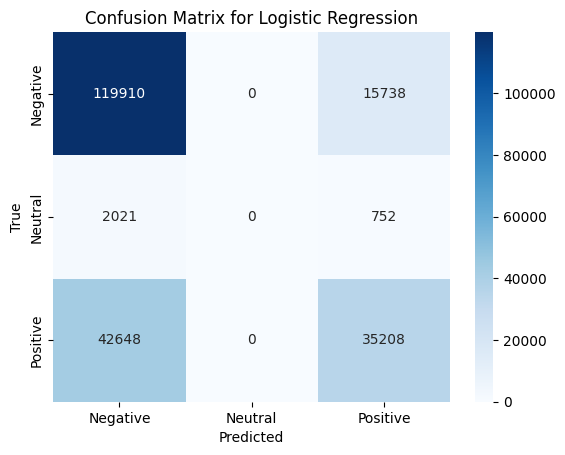


Evaluating Random Forest...
Accuracy: 0.636456951039639
              precision    recall  f1-score   support

          -1       0.63      1.00      0.78    135648
           0       0.00      0.00      0.00      2773
           1       0.95      0.03      0.05     77856

    accuracy                           0.64    216277
   macro avg       0.53      0.34      0.28    216277
weighted avg       0.74      0.64      0.51    216277



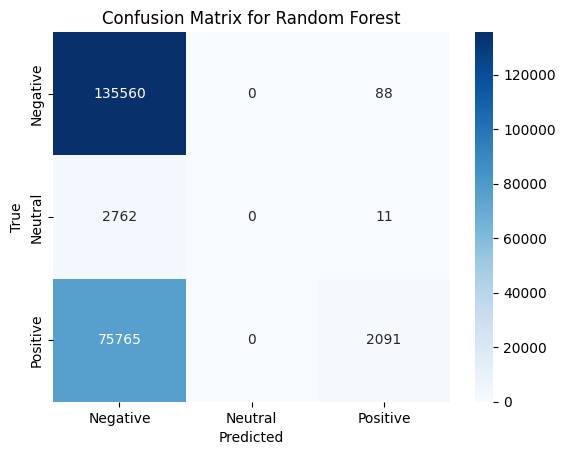

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Import tqdm for progress tracking
import time

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load the dataset
df = pd.read_csv('/content/scaled_tweet_data.csv')

# Function to clean the text (remove URLs, mentions, special characters)
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string cases
        return ''
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@username)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply text cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def tokenize_and_process(text):
    if not isinstance(text, str):  # Ensure input is string
        return ''
    tokens = text.split()  # Use str.split() for faster tokenization
    filtered_tokens = [
        stemmer.stem(word) for word in tokens
        if word not in stop_words and word.isalpha()  # Remove stopwords and non-alphabetic tokens
    ]
    return ' '.join(filtered_tokens)

# Apply tokenization and stemming
df['processed_text'] = df['cleaned_text'].apply(tokenize_and_process)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text'])

# Encode sentiment labels (positive: 1, neutral: 0, negative: -1)
y = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models for hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
}

# Perform GridSearchCV for each model with progress
best_models = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name} with GridSearchCV...")
    start_time = time.time()  # Track time for the process
    grid_search = GridSearchCV(model, param_grid[model_name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    end_time = time.time()  # Track the end time
    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Time taken for {model_name}: {end_time - start_time:.2f} seconds")

# Evaluate the best models
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Misclassified Tweets:
                                                     text  true_sentiment  \
66818                              so tired this morning                1   
78653   @Kelliekk Hmmm...let me check it out.   I'm sorry               1   
840328                                i'm eatingggggg ..                1   
610805   @Iconaholic HA! no... they're $9.99 an envelope               -1   
773185                       has finished all her grapes               -1   
...                                                   ...             ...   
130434  Password meter.. i don't think its usefull  ht...               1   
261157                    I'm listening to it right now.               -1   
911787   Bedtime. Job interview tomorrow. I want a job!!                1   
776539  @Kyrie81 Whoa, a few thousand miles is certain...              -1   
102615    sadly not watching the new show about steve-o!                1   

        predicted_sentiment  
66818                  

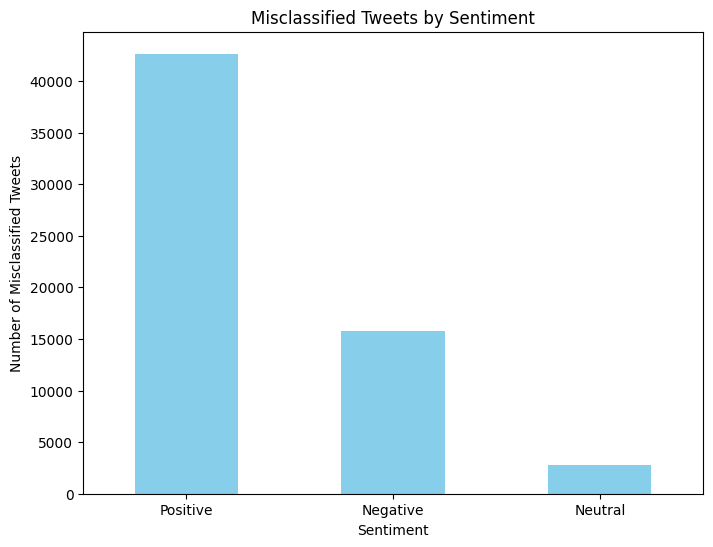

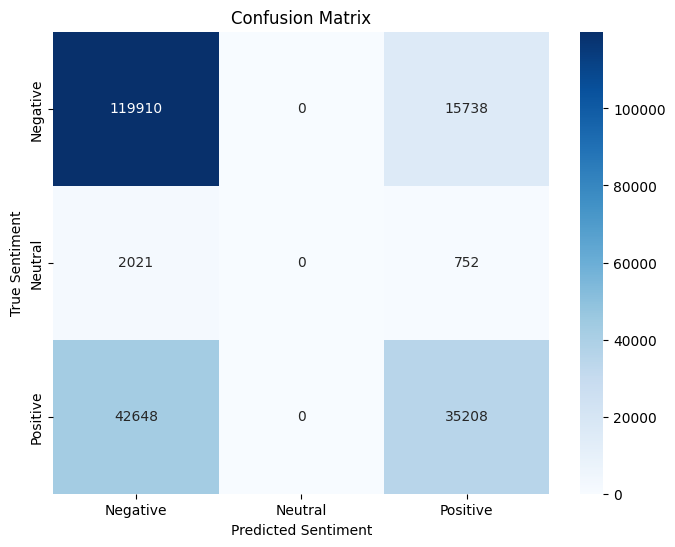

In [ ]:
# Extract misclassified tweets
misclassified = df.iloc[y_test.index]

# Add true sentiment and predicted sentiment to misclassified DataFrame
misclassified['true_sentiment'] = y_test
misclassified['predicted_sentiment'] = y_pred

# Filter to get only misclassified tweets
misclassified = misclassified[misclassified['true_sentiment'] != misclassified['predicted_sentiment']]

# Print misclassified instances
print("Misclassified Tweets:")
print(misclassified[['text', 'true_sentiment', 'predicted_sentiment']])

# Visualization 1: Bar Chart of Misclassified Tweets by Sentiment
misclassified_count = misclassified['true_sentiment'].value_counts()
misclassified_sentiment = misclassified_count.rename({1: 'Positive', 0: 'Neutral', -1: 'Negative'})

plt.figure(figsize=(8, 6))
misclassified_sentiment.plot(kind='bar', color='skyblue')
plt.title('Misclassified Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Misclassified Tweets')
plt.xticks(rotation=0)
plt.show()

# Visualization 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()
